# Homework Assignment 2 

## Risk Graph

### (Notebook 2 of 2)



### <p style="text-align: right;"> Rebecca Kingham</p>
### <p style="text-align: right;"> KinghamRMSU</p>

## Assignment Overview

In this assignment, we'll explore graphs using the board game Risk as our practical example. Risk is a strategy game played on a world map where territories are connected to their neighbors. This makes it a perfect candidate for graph representation and analysis.

### Learning Objectives

- Implement a graph representation of a real-world game board
- practice using networkx
- do some research
- visualize graph data using NetworkX

The assignment is split into two notebooks:
- Notebook 1 of 2 is worth **14 + 33 + 3 = 51 points** 
- Notebook 2 of 2 is worth **1+ 42 + 1 = 44 points** 
for a total of **95 points**. Point values for each part are included in the section headers and question prompts.

**This assignment is due at 11:59 pm on Friday, March 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #2 on D2L.  Submission instructions can be found at the end of the notebook. **You must also fill out a survey regarding this assignment.** The link to this survey can also be found at the end of the notebook.

---
## &#128721; STOP
**Pause to add this file and commit your changes to your Git repository! (1 points)**

---

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

---
<a id="part3"></a>
[Back to ToC](#toc)

## Part 3: Creating the Risk Game Graph (42 points)


![image](https://cf.geekdo-images.com/JM6hEipDwIByZKEIK9Dgeg__imagepage/img/OEl2gaJbUxdvIv6tNPzDsQyLUtQ=/fit-in/900x600/filters:no_upscale():strip_icc()/pic365731.jpg)


&#9989; **Question 3.1 (5 points)**: Create a dictionary that defines the territories in Risk, organized by continents. Each territory should include its neighboring territories. Use the image above for completing the code below

In [2]:
# Define the Risk board territories and their connections
risk_territories = {
    'North America': {
        'Alaska': ['Northwest Territory', 'Alberta', 'Kamchatka'],
        'Northwest Territory': ['Alaska', 'Alberta', 'Greenland'],
        'Greenland': ['Northwest Territory', 'Ontario', 'Quebec', 'Iceland'],
        'Alberta': ['Alaska', 'Northwest Territory', 'Ontario', 'Western United States'],
        'Ontario': ['Alberta', 'Northwest Territory', 'Greenland', 'Quebec', 'Western United States', 'Eastern United States'],
        'Quebec': ['Ontario', 'Greenland', 'Eastern United States'],
        'Western United States': ['Alberta', 'Ontario', 'Eastern United States', 'Central America'],
        'Eastern United States': ['Western United States', 'Ontario', 'Quebec', 'Central America'],
        'Central America': ['Western United States', 'Eastern United States', 'Venezuela']
    },
    # Complete the remaining continents
    'South America': {
        'Venezuela' : ['Central America', 'Brazil', 'Peru'],
        'Brazil': ['Venezuela', 'Peru', 'Argentina', 'North Africa'],
        'Peru': ['Venezuela', 'Brazil', 'Argentina'],
        'Argentina': ['Brazil', 'Peru']
    },
    'Europe': {
        'Great Britain': ['Iceland', 'Scandinavia', 'Northern Europe', 'Western Europe'],
        'Iceland': ['Greenland', 'Great Britain', 'Scandinavia'],
        'Scandinavia': ['Iceland', 'Great Britain', 'Northern Europe', 'Ukraine'],
        'Northern Europe': ['Great Britain', 'Scandinavia', 'Ukraine', 'Southern Europe', 'Western Europe'],
        'Southern Europe': ['Northern Europe', 'Ukraine', 'Middle East', 'North Africa', 'Western Europe', 'Egypt'],
        'Western Europe': ['Great Britain', 'Northern Europe', 'Southern Europe', 'North Africa'],
        'Ukraine': ['Scandinavia', 'Northern Europe', 'Southern Europe', 'Middle East', 'Ural', 'Afghanistan']
    },
    'Africa': {
        'North Africa': ['Western Europe', 'Southern Europe', 'Egypt', 'East Africa', 'Congo', 'Brazil'],
        'Egypt': ['North Africa', 'Middle East', 'East Africa', 'Southern Europe'],
        'East Africa': ['Egypt', 'North Africa', 'Congo', 'South Africa', 'Middle East', 'Madagascar'],
        'Congo': ['North Africa', 'East Africa', 'South Africa'],
        'South Africa': ['Congo', 'East Africa', 'Madagascar'],
        'Madagascar': ['South Africa', 'East Africa']
    },
    'Asia': {
        'Ural': ['Ukraine', 'Siberia', 'China', 'Afghanistan'],
        'Siberia': ['Ural', 'Yakutsk', 'Irkutsk', 'Mongolia', 'China'],
        'Yakutsk': ['Siberia', 'Irkutsk', 'Kamchatka'],
        'Irkutsk': ['Siberia', 'Yakutsk', 'Mongolia', 'Kamchatka'],
        'Mongolia': ['Siberia', 'Irkutsk', 'China', 'Japan', 'Kamchatka'],
        'China': ['Ural', 'Siberia', 'Mongolia', 'Siam', 'Afghanistan', 'India'],
        'Japan': ['Mongolia', 'Kamchatka'],
        'Kamchatka': ['Alaska', 'Yakutsk', 'Irkutsk', 'Japan', 'Mongolia'],
        'Middle East': ['Southern Europe', 'Ukraine', 'Afghanistan', 'India', 'Egypt', 'East Africa'],
        'Afghanistan': ['Ural', 'China', 'India', 'Middle East', 'Ukraine'],
        'India': ['Afghanistan', 'China', 'Siam', 'Middle East'],
        'Siam': ['India', 'China', 'Indonesia']
    },
    'Australia': {
        'Indonesia': ['Siam', 'New Guinea', 'Western Australia'],
        'New Guinea': ['Indonesia', 'Western Australia', 'Eastern Australia'],
        'Western Australia': ['Indonesia', 'New Guinea', 'Eastern Australia'],
        'Eastern Australia': ['Western Australia', 'New Guinea']
    }
}


### Graph Creation

&#9989; **Question 3.2 (7 points)**: Create a NetworkX graph object from the territory definitions. The territories are the nodes of the graph. Implement a function that builds the graph and adds appropriate attributes for continents. _Hint:_ Look up the documentation of `add_node`, what are the possible inputs? Don't forget to connect each territory to its neighbors. Make sure to add plenty of comments in your code.

In [3]:
def create_risk_graph(territories):
    """
    Create a NetworkX graph from the Risk territory definitions.
    
    Parameters:
        territories (dict): Dictionary containing territory and connection information
        
    Returns:
        G (nx.Graph): NetworkX graph representing the Risk board
    """
    # Your code here
    G = nx.Graph()

    # iterate through each continent and it's territories
    for continent, territory_data in territories.items():
        # iterate through territories and neighbors in current continent
        for territory, neighbors in territory_data.items():
            # add the territory as a node to the graph, including continent as an attribute
            G.add_node(territory, continent=continent)
            # iterate through neighbors of current territory
            for neighbor in neighbors:
                # add edge between current territory and it's neighbor
                G.add_edge(territory, neighbor)

    return G

# Create the graph
G = create_risk_graph(risk_territories)


### Graph Visualization

&#9989; **Question 3.3 (4 points)**: Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

- make a plot of the risk graph.
- color nodes by continent
- allow the user to choose a type of layout. _Hint:_ search networkx documentation for the possible layout. Min 5 layouts should be available.
- print the name of each territory on the respective node
- make a legend for the graph 
- have very descriptive comments 
- increase the size of each node from the default value  
- increase the font size of label from the default value

Available graph layouts:
1. Circular
2. Random
3. Spring
4. Shell
5. Planar
6. Spectral


Enter the number of the layout you want to use:  3


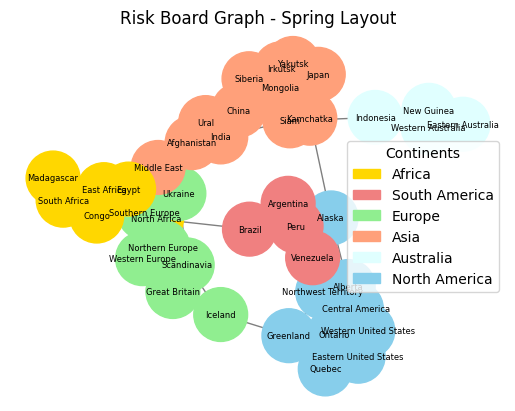

In [6]:
def visualize_risk_graph(G):
    """
    Create a visualization of the Risk board graph with continents colored differently.
    
    Parameters:
        G (nx.Graph): NetworkX graph of the Risk board
    """
    # Your code here
    # Get the unique continents from the graph node attributes
    continents = set(nx.get_node_attributes(G, 'continent').values())
    # Define a color map for the continents
    # You can choose your own colors
    continent_colors = {
        'North America': 'skyblue',
        'South America': 'lightcoral',
        'Europe': 'lightgreen',
        'Africa': 'gold',
        'Asia': 'lightsalmon',
        'Australia': 'lightcyan'
    }

    # Get the color for each node based on its continent
    node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes()]

    # Get the labels for each node (the territory names)
    node_labels = {node: node for node in G.nodes()}

    # Define the available layout options
    layout_options = {
        "Circular": nx.circular_layout,
        "Random": nx.random_layout,
        "Spring": nx.spring_layout,
        "Shell": nx.shell_layout,
        "Planar": nx.planar_layout,
        "Spectral": nx.spectral_layout
    }

    # Let the user choose a layout
    print("Available graph layouts:")
    for i, layout_name in enumerate(layout_options.keys()):
        print(f"{i+1}. {layout_name}")

    while True:
        try:
            choice = int(input("Enter the number of the layout you want to use: "))
            if 1 <= choice <= len(layout_options):
                selected_layout_name = list(layout_options.keys())[choice - 1]
                layout_function = layout_options[selected_layout_name]
                break
            else:
                print("Invalid choice. Please enter a number from the list.")
        except ValueError:
            print("Invalid input. Please enter a number.")

    # Apply the chosen layout to get the node positions
    pos = layout_function(G)

    # Increase the size of the nodes
    node_size = 1500

    # Increase the font size of the labels
    font_size = 6

    # Draw the nodes with colors based on continent
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_size)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, alpha=0.5)

    # Draw the labels (territory names) on the nodes
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=font_size)

    # Create a legend for the continents
    handles = [plt.Rectangle((0, 0), 1, 1, color=continent_colors[continent]) for continent in continents]
    plt.legend(handles, continents, title="Continents")

    # Set the title of the plot
    plt.title(f"Risk Board Graph - {selected_layout_name} Layout")

    # Remove axis ticks and labels for a cleaner look
    plt.axis("off")

    # Display the plot
    plt.show() 


# Visualize the graph
visualize_risk_graph(G)


# from Gemini, prompt was copy pasting previous code + ' Create a visualization of the Risk board graph. You can use AI to help you with this. The function below should:

# make a plot of the risk graph.
# color nodes by continent
# allow the user to choose a type of layout. Hint: search networkx documentation for the possible layout. Min 5 layouts should be available.
# print the name of each territory on the respective node
# make a legend for the graph
# have very descriptive comments
# increase the size of each node from the default value
# increase the font size of label from the default value'z

&#9989; **Question 3.4 (26 points)**: Answer the following questions based on the Risk board graph visualization. Each answer should have a minimum of 1-2 sentences and snippet of the code that supports your answer. You must explain what each function in the code snippet does. 

All answers should be in the same markdown cell. 

The code snippet should be properly displayed using code markdown. 

1. Which layout type provides the best visualization of the continent-based clustering in the Risk board graph?
    - Explain the rationale behind your choice of layout.
2. Do a little research and explain what the Kamada-Kawai layout does? Make sure to cite your sources.
3. Which part of the code is used to assign the color of each node based on its continent?
4. How did you make the legend? Explain any non-obvious part of the code.
5. What colormap did you choose for the continents and how did you import the colormap? 
6. How did you set the node size and font size in the visualization?
7. How did you print the labels for the nodes? 

1. the spring layout was the best because it grouped together the continents. presumably it is just grouping together nodes that are frequently connected to each other.
2. the Kamada-Kawai is a layout that simulates the edges as springs and tries to minimize the distance between nodes. source: https://coursepages2.tuni.fi/mttts17/wp-content/uploads/sites/136/2020/04/drv_2020_lecture13.pdf
3. this code creates a dictionary of colors and continents, and then uses the 'continent' attribute of each node to look up what the color should be. it then stores it all using a list comprehention 
    ```
        # Define a color map for the continents
        # You can choose your own colors
        continent_colors = {
            'North America': 'skyblue',
            'South America': 'lightcoral',
            'Europe': 'lightgreen',
            'Africa': 'gold',
            'Asia': 'lightsalmon',
            'Australia': 'lightcyan'
        }
    
        # Get the color for each node based on its continent
        node_colors = [continent_colors[G.nodes[node]['continent']] for node in G.nodes()]
    ```
4. this code creates a list of plot objects, where each continent has a little box of the color that represents that continent. it then uses the built in legend function to create the final legend.
```
    # Create a legend for the continents
    handles = [plt.Rectangle((0, 0), 1, 1, color=continent_colors[continent]) for continent in continents]
    plt.legend(handles, continents, title="Continents")
```
5. it does't use a colormap, instead it creates a dictionary of continents and color strings recognised by matplotlib
```
    continent_colors = {
        'North America': 'skyblue',
        'South America': 'lightcoral',
        'Europe': 'lightgreen',
        'Africa': 'gold',
        'Asia': 'lightsalmon',
        'Australia': 'lightcyan'
    }
```
6. it creates a variable called 'font_size' and uses that as the font size parameter of the function that draws the labels
```
    # Increase the font size of the labels
    font_size = 6

    

    # Draw the labels (territory names) on the nodes
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=font_size)
```
7. it creates a dictionary of nodes and their names and then uses that dictionary in the .draw_networkx_labels() function as the labels parameter
```
   # Get the labels for each node (the territory names)
    node_labels = {node: node for node in G.nodes()}

    # Draw the labels (territory names) on the nodes
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=font_size)
```

---
## &#128721; STOP
**Pause to commit your changes to your Git repository! (1 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "**Committing Part 3**", no need to push the changes to GitHub yet, but you can if you want.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [5]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

If you like, you can upload this file to D2L for a record. Nevertheless, **we will grade the copy on GitHub**. 


&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University